# 0. Install and Import Dependencies test

In [1]:
%pip install mediapipe opencv-python

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\Will\AppData\Local\Programs\Python\Python38\python.exe -m pip install --upgrade pip' command.


In [1]:
import mediapipe as mp
import cv2
import numpy as np
mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose

In [3]:
# Video feed
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    cv2.imshow('Mediapipe Feed', frame)
    
    if cv2.waitKey() & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

# 1. Make Detections

In [3]:
cap = cv2.VideoCapture(0)

# Setup mediapipe instance
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    while cap.isOpened():
        ret, frame = cap.read()

        # RECOLOUR IMAG
        #grabs "frame", reorders colour arrays because of history of openCV
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        #saves memory because we know the image isn't writeable
        image.flags.writeable = False

        # MAKE DETECTION
        #stores detections in results
        results = pose.process(image)

        # RECOLOR BACK TO BGR
        #image is now writable
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

        # RENDER DETECTIONS
        # draws the detections (landmarks) to the image 
        # results.pose_landmarks is an array containing the coordinates of every landmark in the body
        # mp_pose.POSE_CONNECTIONS is an array containing the connections
        # the first mp_drawing.DrawingSpec is the colour specifications for the points
        # the second is the colour specification of the lines
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2), 
                                mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2) 
                                 ) 

        # initially the tutorial uses "frame" as the second argument, displaying
        # exactly what is shown to the camera from cap.read(). It is later changed
        # to "image" as shown below, as this is the modified frame containing the landmarks.
        cv2.imshow('Mediapipe Feed', image) 

        # the waitKey method keeps the current displayed 10 milliseconds.
        # If it has been 10 
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    # closes the feed window and releases the camera
    cap.release()
    cv2.destroyAllWindows()

# 2. Determining Joints

The image below demonstrates how mediapipe classifies each landmark

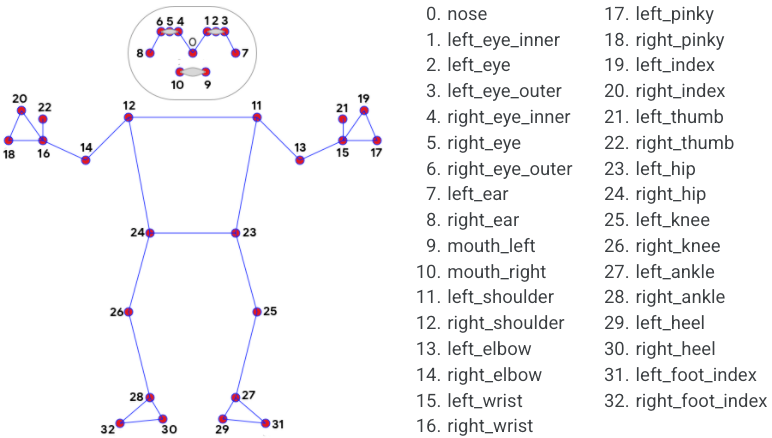

# Some info about landmarks from MediaPipe documentation
POSE_LANDMARKS
A list of pose landmarks. Each landmark consists of the following:

x and y: Landmark coordinates normalized to [0.0, 1.0] by the image width and height respectively.

My summary:
Basically, the position of the landmark is divided by the number of pixels.
For example, if we have a 1920x1080 image and there's a landmark near the image's center at [1000, 540], the normalized coordinates are [1000/1920, 540/1080] which is [0.521, 0.5].

z: Represents the landmark depth with the depth at the midpoint of hips being the origin, and the smaller the value the closer the landmark is to the camera. The magnitude of z uses roughly the same scale as x.
visibility: A value in [0.0, 1.0] indicating the likelihood of the landmark being visible (present and not occluded) in the image.

My summary:
Because MediaPipe creates 3D pose estimations out of 2D images, it has to make estimations about the depth of each landmark. Still trying to understand the scale properly. The model will still try to detect the depth of hidden landmarks, and rates the likelihood the landmark is visible with a scale of 0 to 1.

https://mediapipe.dev/images/mobile/pose_world_landmarks.mp4



In [14]:
cap = cv2.VideoCapture(0)

# Setup mediapipe instance
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    while cap.isOpened():
        # assigns the camera's output to both variables
        ret, frame = cap.read()

        # RECOLOUR IMAGE
        # grabs "frame", reorders colour arrays to BGR because history of openCV
        # makes it work with only RGB (BGR2RGB means "frame" is reordered from RGB to BGR)
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        #saves memory because we know the image isn't being written to
        image.flags.writeable = False

        # MAKE DETECTION
        #stores detections in results
        results = pose.process(image)

        # RECOLOR BACK TO BGR
        #image is now writable
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

        # EXTRACT LANDMARKS

        # We use a try-except block because there will be times the landmarks are not clear.
        # This allows easy error handling; if there are no detections, we will ignore it rather than
        # having the program crash.
        try:
            # results.pose_landmarks.landmark is an array of landmarks
            landmarks = results.pose_landmarks.landmark
        except:
            pass

        # RENDER DETECTIONS
        # draws the detections (landmarks) to the image 
        # results.pose_landmarks is an array containing the coordinates of every landmark in the body
        # mp_pose.POSE_CONNECTIONS is an array containing the connections
        # the first mp_drawing.DrawingSpec is the colour specifications for the points
        # the second is the colour specification of the lines
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2), 
                                mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2) 
                                 ) 

        # initially the tutorial uses "frame" as the second argument, displaying
        # exactly what is shown to the camera from cap.read(). It is later changed
        # to "image" as shown below, as this is the modified frame containing the landmarks.
        cv2.imshow('Mediapipe Feed', image) 

        # the waitKey method keeps the current frame displayed 10 milliseconds, or until a key is pressed
        # Because of this property and the conditions below, when the user presses 'q'
        # the frame will be closed and the loop will be broken.
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    # closes the feed window and releases the camera
    cap.release()
    cv2.destroyAllWindows()

[x: 0.5421230792999268
y: 0.5671834945678711
z: -0.6635141372680664
visibility: 0.9999904632568359
, x: 0.5632651448249817
y: 0.5183494091033936
z: -0.6063666939735413
visibility: 0.9999732971191406
, x: 0.5780333280563354
y: 0.5217441320419312
z: -0.6062241792678833
visibility: 0.9999744892120361
, x: 0.5920521020889282
y: 0.5258692502975464
z: -0.6062114238739014
visibility: 0.9999724626541138
, x: 0.5146855115890503
y: 0.5147613286972046
z: -0.6090158820152283
visibility: 0.9999788999557495
, x: 0.4964308738708496
y: 0.5166358947753906
z: -0.6081393361091614
visibility: 0.9999812841415405
, x: 0.47874873876571655
y: 0.5200580358505249
z: -0.6084108948707581
visibility: 0.9999819993972778
, x: 0.6131816506385803
y: 0.5677694082260132
z: -0.3114401400089264
visibility: 0.9999622106552124
, x: 0.4503360390663147
y: 0.562849760055542
z: -0.305421382188797
visibility: 0.9999849796295166
, x: 0.5693493485450745
y: 0.6440986394882202
z: -0.5578311681747437
visibility: 0.9999747276306152
, 

In [15]:
len(landmarks)

33

In [16]:
for landmark in mp_pose.PoseLandmark:
    print(landmark)

PoseLandmark.NOSE
PoseLandmark.LEFT_EYE_INNER
PoseLandmark.LEFT_EYE
PoseLandmark.LEFT_EYE_OUTER
PoseLandmark.RIGHT_EYE_INNER
PoseLandmark.RIGHT_EYE
PoseLandmark.RIGHT_EYE_OUTER
PoseLandmark.LEFT_EAR
PoseLandmark.RIGHT_EAR
PoseLandmark.MOUTH_LEFT
PoseLandmark.MOUTH_RIGHT
PoseLandmark.LEFT_SHOULDER
PoseLandmark.RIGHT_SHOULDER
PoseLandmark.LEFT_ELBOW
PoseLandmark.RIGHT_ELBOW
PoseLandmark.LEFT_WRIST
PoseLandmark.RIGHT_WRIST
PoseLandmark.LEFT_PINKY
PoseLandmark.RIGHT_PINKY
PoseLandmark.LEFT_INDEX
PoseLandmark.RIGHT_INDEX
PoseLandmark.LEFT_THUMB
PoseLandmark.RIGHT_THUMB
PoseLandmark.LEFT_HIP
PoseLandmark.RIGHT_HIP
PoseLandmark.LEFT_KNEE
PoseLandmark.RIGHT_KNEE
PoseLandmark.LEFT_ANKLE
PoseLandmark.RIGHT_ANKLE
PoseLandmark.LEFT_HEEL
PoseLandmark.RIGHT_HEEL
PoseLandmark.LEFT_FOOT_INDEX
PoseLandmark.RIGHT_FOOT_INDEX


Because each landmark has an index, you can retrieve the information about each specific landmark by calling landmarks[i] as shown below. 'i' is the specific index of the landmark you're looking for. You can get this index value by retrieving the value attribute of whichever landmark you're aiming for.

In [18]:
landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value]

x: 0.7463893890380859
y: 0.9364928007125854
z: -0.3069285750389099
visibility: 0.9633949398994446